In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


The data is taken from: "https://www.kaggle.com/competitions/predict-who-is-more-influential-in-a-social-network"

## About the dataset
The dataset has 11 variables describing each person's Twiiter Activity. These variables are:

- Follower Count: Number of followers of the person on Twitter
- Follwoing Count: Number of Twitter users the person follows
- Listed Count: Number of people that have added the person to a list
- Mentions Received: Number of times people have mentioned (@) the person
- Retweets Received: Number of times a tweet was retweeted
- Mentions Sent: Number of times the person mentioned (@) someone
- Retweets Sent: Number of times the person retweet a tweet
- Posts: Number of posts
- Network Feature 1, 2, 3: Local follower network of the person

In [41]:
Twitter_train = pd.read_csv("train.csv")
Twitter_train.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [42]:
Twitter_test = pd.read_csv("test.csv")
Twitter_test.head()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,614689,400,5729,199.618296,67.812469,9.366192,0.359534,4.094488,669,39.193741,...,563,20057,967.720642,579.431128,4.473798,0.805680,6.241806,4027,57.643839,3201.293706
1,739581,10723,1279,102.026750,96.771319,1.537322,1.054358,3.467754,432,11.191686,...,12949,1311,38.260522,10.697567,12.845793,1.584284,12.106662,144,209.717241,21496.565517
2,3638,3341,85,2.793577,1.402703,2.594089,0.598150,3.802143,11,9.416667,...,320,3673,1207.190077,599.721600,0.842022,0.593199,7.044735,3918,7.859818,637.983300
3,613,1259,31,1.326041,0.356943,6.249678,2.323064,7.488116,4,5.000000,...,3599,1072,10.300222,3.828561,1.624092,0.100503,1.614287,43,113.840909,2537.772727
4,1352348,331,15647,19129.848662,14552.733991,2.065418,0.580955,16.281502,52580,3.092448,...,147521,15043,9902.070379,5012.055876,10.438460,0.100503,193.072418,28564,10.964144,1035.955493


In [43]:
Twitter_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Choice               5500 non-null   int64  
 1   A_follower_count     5500 non-null   int64  
 2   A_following_count    5500 non-null   int64  
 3   A_listed_count       5500 non-null   int64  
 4   A_mentions_received  5500 non-null   float64
 5   A_retweets_received  5500 non-null   float64
 6   A_mentions_sent      5500 non-null   float64
 7   A_retweets_sent      5500 non-null   float64
 8   A_posts              5500 non-null   float64
 9   A_network_feature_1  5500 non-null   int64  
 10  A_network_feature_2  5500 non-null   float64
 11  A_network_feature_3  5500 non-null   float64
 12  B_follower_count     5500 non-null   int64  
 13  B_following_count    5500 non-null   int64  
 14  B_listed_count       5500 non-null   int64  
 15  B_mentions_received  5500 non-null   f

In [44]:
Twitter_train.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,...,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,...,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,...,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,...,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,...,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,...,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,...,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,...,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


In [45]:
Twitter_train.isnull().sum()

Choice                 0
A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64

## Correlations :

[Text(0.5, 0, 'A_follower_count'),
 Text(1.5, 0, 'A_following_count'),
 Text(2.5, 0, 'A_listed_count'),
 Text(3.5, 0, 'A_mentions_received'),
 Text(4.5, 0, 'A_retweets_received'),
 Text(5.5, 0, 'A_mentions_sent'),
 Text(6.5, 0, 'A_retweets_sent'),
 Text(7.5, 0, 'A_posts'),
 Text(8.5, 0, 'A_network_feature_1'),
 Text(9.5, 0, 'A_network_feature_2'),
 Text(10.5, 0, 'A_network_feature_3')]

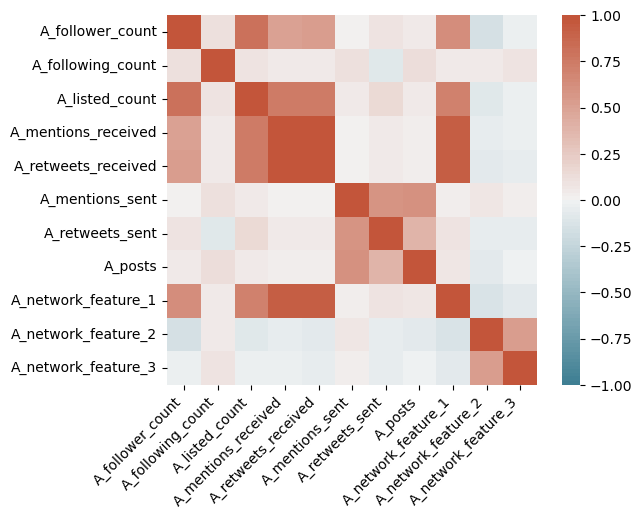

In [46]:
#Correlations between the columns for the influencer A
corr_A = Twitter_train .iloc[:,1:12].corr(method = 'pearson')
corr_A

ax = sns.heatmap( 
    corr_A,
    vmin=-1, vmax=1, center=0, 
    cmap=sns.diverging_palette(220, 20, n=100,center='light'),
    square=True,
)
ax.set_xticklabels(  
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right'
)

[Text(0.5, 0, 'B_follower_count'),
 Text(1.5, 0, 'B_following_count'),
 Text(2.5, 0, 'B_listed_count'),
 Text(3.5, 0, 'B_mentions_received'),
 Text(4.5, 0, 'B_retweets_received'),
 Text(5.5, 0, 'B_mentions_sent'),
 Text(6.5, 0, 'B_retweets_sent'),
 Text(7.5, 0, 'B_posts'),
 Text(8.5, 0, 'B_network_feature_1'),
 Text(9.5, 0, 'B_network_feature_2'),
 Text(10.5, 0, 'B_network_feature_3')]

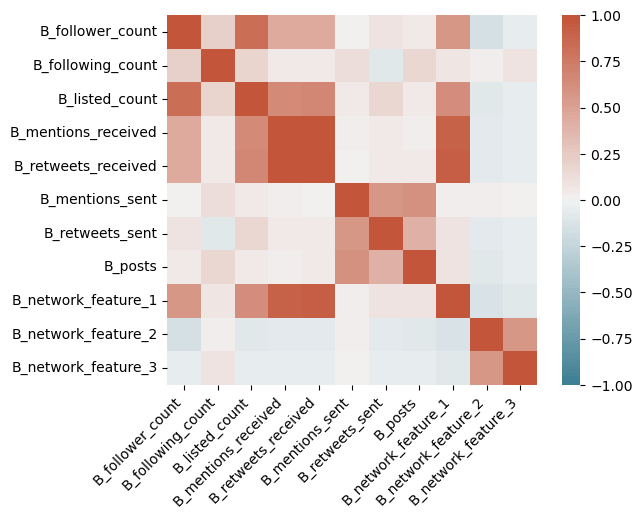

In [47]:
#Correlations between the columns for the influencer B
corr_B = Twitter_train .iloc[:,12:23].corr(method = 'pearson')
corr_B

ax = sns.heatmap( 
    corr_B,
    vmin=-1, vmax=1, center=0, 
    cmap=sns.diverging_palette(220, 20, n=100,center='light'),
    square=True,
)
ax.set_xticklabels(  
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right'
)

In [48]:
X = Twitter_train.iloc[:,1:23]

In [49]:
X.shape

(5500, 22)

In [50]:
y= Twitter_train.iloc[:,0]

In [51]:
y.shape

(5500,)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3850, 22)
(3850,)
(1650, 22)
(1650,)


## Applying Machine Learning Models to identify key predictors of Social Influence

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('Xgboost', XGBClassifier()))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.739740 (0.022064)


C:\Users\Jit Nandi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Jit Nandi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

KNN: 0.736364 (0.023355)
CART: 0.711688 (0.029660)
RF: 0.773247 (0.023493)
NB: 0.561818 (0.013499)
SVM: 0.524156 (0.010760)
Xgboost: 0.761558 (0.024989)


In [55]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logreg = LogisticRegression(max_iter = 2000)
logreg.fit(X_train, y_train.values.ravel())


LogisticRegression(max_iter=2000)

In [56]:
# Calculating the accuracy of our model 

print("Training accuracy of Logistic Regression model:", model_logreg.score(X_train, y_train))
print("Testing accuracy of Logistic Regression model:", model_logreg.score(X_test, y_test))

Training accuracy of Logistic Regression model: 0.7420779220779221
Testing accuracy of Logistic Regression model: 0.7484848484848485


In [57]:
import statsmodels.api as sm

logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.570440
         Iterations 7
                           Results: Logit
Model:                Logit            Pseudo R-squared: 0.177      
Dependent Variable:   Choice           AIC:              6318.8409  
Date:                 2024-01-10 22:51 BIC:              6464.3159  
No. Observations:     5500             Log-Likelihood:   -3137.4    
Df Model:             21               LL-Null:          -3811.3    
Df Residuals:         5478             LLR p-value:      1.4124e-272
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       7.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
A_follower_count    -0.0000   0.0000  -3.6798 0.0002 -0.0000 -0.0000
A_following_count    0.0000 

In [58]:
y_pred = model_logreg.predict(X_test)

In [59]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix (y_test,y_pred)
print(confusion_matrix)

[[594 229]
 [186 641]]


The confusion matrix visualises the actual and predicted values of the data thereby depicting the performance of a supervised algorithm. Here, it can be inferred that there are 1,235 correct predictions and 415 incorrect predictions.

In [60]:
# Classification report will summarise our model by computing precision, recall, f-measure and support 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       823
           1       0.74      0.78      0.76       827

    accuracy                           0.75      1650
   macro avg       0.75      0.75      0.75      1650
weighted avg       0.75      0.75      0.75      1650



In classification report, high precision means that an algorithm returned more relevant results than irrelevant, while high recall means that an algorithm returned most of the relevant results. In the Logistic regression model, there is a 75% precision that there are more relevant values and a 75% recall that most of the relevant values are included in our model.

In [61]:
# K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
model_knn.fit(X_train, y_train)

y_pred = model_knn.predict(X_test)

C:\Users\Jit Nandi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [62]:
# Calculating training and testing of our model

print("Training accuracy of K-Nearest Neighbors model:", model_knn.score(X_train, y_train))
print("Testing accuracy of K-Nearest Neighbors model:", model_knn.score(X_test, y_test))

C:\Users\Jit Nandi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Jit Nandi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

Training accuracy of K-Nearest Neighbors model: 0.8067532467532468
Testing accuracy of K-Nearest Neighbors model: 0.7296969696969697


In [63]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[582 241]
 [205 622]]


The confusion matrix visualises the actual and predicted values of the data thereby depicting the performance of a supervised algorithm. Here, it can be inferred that there are 1,204 correct predictions and 446 incorrect predictions.

In [64]:
# Classification report will summarise our model by computing precision, recall, f-measure and support 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       823
           1       0.72      0.75      0.74       827

    accuracy                           0.73      1650
   macro avg       0.73      0.73      0.73      1650
weighted avg       0.73      0.73      0.73      1650



In classification report, high precision means that an algorithm returned more relevant results than irrelevant, while high recall means that an algorithm returned most of the relevant results. In the KNN model, there is a 73% precision that there are more relevant values and a 73% recall that most of the relevant values are included in our model.

In [65]:
# Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train) #Train the model on training data 

# Predicting the test results 
  
y_pred = model_rf.predict(X_test)

In [66]:
# Calculating the accuracy of our model  

print("Training accuracy of Random Forest model:", model_rf.score(X_train, y_train))
print("Testing accuracy of Random Forest model:", model_rf.score(X_test, y_test))

Training accuracy of Random Forest model: 0.9942857142857143
Testing accuracy of Random Forest model: 0.7715151515151515


In [67]:
feature_importances = pd.DataFrame(model_rf.feature_importances_,
                          index = X_train.columns, 
                          columns = ['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
A_follower_count,0.083903
A_listed_count,0.072593
B_network_feature_1,0.072531
B_listed_count,0.071263
B_mentions_received,0.064141
A_mentions_received,0.060130
B_follower_count,0.059677
A_network_feature_1,0.055416
B_retweets_received,0.055145
A_retweets_received,0.047125


In [68]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[623 200]
 [177 650]]


The confusion matrix visualises the actual and predicted values of the data thereby depicting the performance of a supervised algorithm. Here, it can be inferred that there are 1,273 correct predictions and 377 incorrect predictions.

In [69]:
# Classification report will summarise our model by computing precision, recall, f-measure and support 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       823
           1       0.76      0.79      0.78       827

    accuracy                           0.77      1650
   macro avg       0.77      0.77      0.77      1650
weighted avg       0.77      0.77      0.77      1650



In classification report, high precision means that an algorithm returned more relevant results than irrelevant, while high recall means that an algorithm returned most of the relevant results. In the Random forest model, there is a 77% precision that there are more relevant values and a 77% recall that most of the relevant values are included in our model.

In [70]:
# XGBoost Classifier 

from xgboost import XGBClassifier
from xgboost import plot_importance

model_xgb = XGBClassifier(max_depth = 2, 
                          objective = 'binary:logistic',
                          eta = 0.3
                         )
model_xgb

model_xgb.fit(X_train, y_train)
print(model_xgb)

y_pred = model_xgb.predict(X_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)


Training accuracy of XGBoost model: 0.8285714285714286
Testing accuracy of XGBoost model: 0.7696969696969697


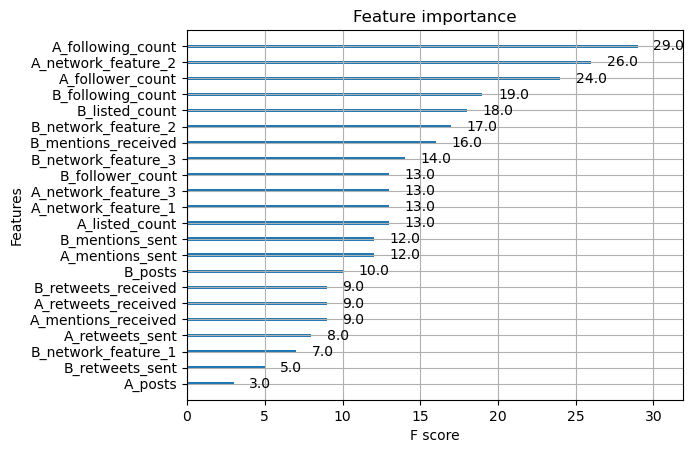

In [71]:
# Calculating training and testing of our model

print("Training accuracy of XGBoost model:", model_xgb.score(X_train, y_train))
print("Testing accuracy of XGBoost model:", model_xgb.score(X_test, y_test))


plot_importance(model_xgb)
pyplot.show()

In [72]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[617 206]
 [174 653]]


The confusion matrix visualises the actual and predicted values of the data thereby depicting the performance of a supervised algorithm. Here, it can be inferred that there are 1,266 correct predictions and 380 incorrect predictions.

In [73]:
# Classification report will summarise our model by computing precision, recall, f-measure and support 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       823
           1       0.76      0.79      0.77       827

    accuracy                           0.77      1650
   macro avg       0.77      0.77      0.77      1650
weighted avg       0.77      0.77      0.77      1650



In classification report, high precision means that an algorithm returned more relevant results than irrelevant, while high recall means that an algorithm returned most of the relevant results. In the XGBoost model, there is a 77% precision that there are more relevant values and a 77% recall that most of the relevant values are included in our model.

I tried 4 models on the dataset: Logistic Regression, Random Forest, K-Nearest Neighbors and XGBoost. After analysing all models, we can see that both Random Forest Classifier and XGboost Classifier performing well. Further, on analyzing the confusion matrix, the Random Forest Classifier has made more correct predictions(1273) than XGB Classifier. So I am selecting the Random Forest model to predict the Twitter_test data.

In [74]:
y_pred_final = model_rf.predict(Twitter_test)

In [75]:
Sample = pd.read_csv("sample_predictions.csv")

In [76]:
Sample

,Id,Choice
0,1,0.315025
1,2,0.474330
2,3,0.098802
3,4,0.137932
4,5,0.523677
...,...,...
5947,5948,0.300438
5948,5949,0.752105
5949,5950,0.470161
5950,5951,0.431636


In [77]:
Sample["Predicted"] = y_pred_final

In [78]:
Sample

,Id,Choice,Predicted
0,1,0.315025,0
1,2,0.474330,1
2,3,0.098802,0
3,4,0.137932,0
4,5,0.523677,0
...,...,...,...
5947,5948,0.300438,0
5948,5949,0.752105,1
5949,5950,0.470161,1
5950,5951,0.431636,1
